In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm, datasets, linear_model

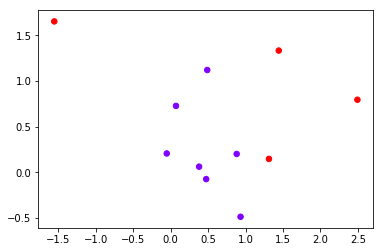

In [4]:
class_1 = 7
class_2 = 4
centers = [[0.0, 0.0], [1, 1]]
cluster_std = [0.5, 1]
X, y = datasets.make_blobs(n_samples=[class_1, class_2], 
                           centers=centers,
                           cluster_std= cluster_std,
                           random_state = 0,
                           shuffle= False
                          )
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=30)

In [8]:
# 探索概率和阈值的关系
# 建立模型
clf = linear_model.LogisticRegression().fit(X, y)
prob = clf.predict_proba(X)

import pandas as pd
prob = pd.DataFrame(prob, columns=['0', '1'])
prob

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1
0,0.604664,0.395336
1,0.458916,0.541084
2,0.717986,0.282014
3,0.679109,0.320891
4,0.664739,0.335261
5,0.562775,0.437225
6,0.662054,0.337946
7,0.355167,0.644833
8,0.381606,0.618394
9,0.585284,0.414716


In [10]:
# 使用阈值0.5 大于0.5的样本被预测为1，小于0.5的样本被预测为0
for i in range(prob.shape[0]):
    if prob.loc[i, '1'] > 0.5:
        prob.loc[i, 'pred'] = 1
    else:
        prob.loc[i, 'pred'] = 0

In [12]:
# 在增加一列真实值
prob['y_true'] = y
prob

,0,1,pred,y_true
0,0.604664,0.395336,0.0,0
1,0.458916,0.541084,1.0,0
2,0.717986,0.282014,0.0,0
3,0.679109,0.320891,0.0,0
4,0.664739,0.335261,0.0,0
5,0.562775,0.437225,0.0,0
6,0.662054,0.337946,0.0,0
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
9,0.585284,0.414716,0.0,1


In [18]:
from sklearn import metrics
result = metrics.confusion_matrix(prob['y_true'], prob['pred'], labels=[1, 0])
result

array([[2, 2],
       [1, 6]])

In [22]:
# 手动计算精确度和召回率
# 精确度 所有预测为1的样本中，被预测正确的样本所占的比例
p = result[0,0] / result[:, 0].sum()
print('精确度：', p)

# 召回率 所有真实为1的样本中，被预测正确的样本所占的比例
r = result[0,0] / result[0, :].sum()
print('召回率：', r)


精确度： 0.6666666666666666
召回率： 0.5


In [23]:
# 使用metrics接口计算
metrics.precision_score(prob['y_true'], prob['pred'], labels=[1, 0])

0.6666666666666666

In [26]:
metrics.recall_score(prob['y_true'], prob['pred'], labels=[1, 0])


0.5

In [27]:
metrics.f1_score(prob['y_true'], prob['pred'], labels=[1, 0])

0.5714285714285715

In [28]:
# 接下来改变阈值 再次测试
for i in range(prob.shape[0]):
    if prob.loc[i, '1'] > 0.4:
        prob.loc[i, 'pred'] = 1
    else:
        prob.loc[i, 'pred'] = 0
prob

,0,1,pred,y_true
0,0.604664,0.395336,0.0,0
1,0.458916,0.541084,1.0,0
2,0.717986,0.282014,0.0,0
3,0.679109,0.320891,0.0,0
4,0.664739,0.335261,0.0,0
5,0.562775,0.437225,1.0,0
6,0.662054,0.337946,0.0,0
7,0.355167,0.644833,1.0,1
8,0.381606,0.618394,1.0,1
9,0.585284,0.414716,1.0,1


In [29]:
result = metrics.confusion_matrix(prob['y_true'], prob['pred'], labels=[1, 0])
p = result[0,0] / result[:, 0].sum()
print('精确度：', p)

# 召回率 所有真实为1的样本中，被预测正确的样本所占的比例
r = result[0,0] / result[0, :].sum()
print('召回率：', r)

精确度： 0.6666666666666666
召回率： 1.0


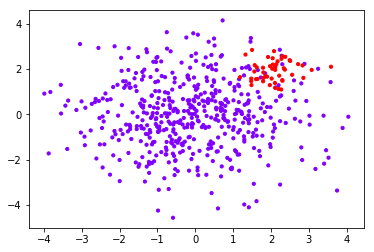

In [30]:
# svm上概率问题
class_1 = 500 # 类别1有500个样本
class_2 = 50 # 类别2有50个样本  
# 设置这两个类别的中心
centers = [[0, 0], [2.0, 2.0]]
# 设置这两个类的方差 方差越大 波动越大
clusters_std = [1.5, 0.5]
X, y = datasets.make_blobs(n_samples=[class_1, class_2], 
                           centers=centers, 
                           cluster_std=clusters_std,
                           random_state=0,
                           shuffle=False
                          )
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=10)

In [34]:
# 建立模型
clf_proba = svm.SVC(kernel='linear', probability=True).fit(X, y)
clf_proba.predict_proba(X)

array([[0.68562801, 0.31437199],
       [0.25662918, 0.74337082],
       [0.96408796, 0.03591204],
       ...,
       [0.14987888, 0.85012112],
       [0.35036657, 0.64963343],
       [0.30946176, 0.69053824]])

In [35]:
clf_proba.decision_function(X)

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

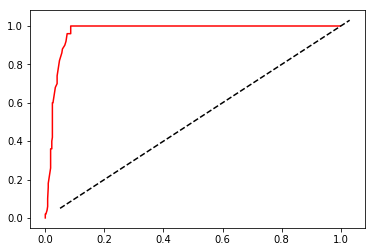

In [39]:
# 绘制roc曲线
# 召回率数组
recall = []
# 特异度
specificity = []
# 预测所属标签的概率
clf_proba_predict = clf_proba.predict_proba(X)
proba_range = np.linspace(clf_proba_predict.min(), clf_proba_predict.max(), num=50, endpoint=False)
for i in proba_range:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba_predict[j, 1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = metrics.confusion_matrix(y, y_pred=y_predict, labels=[1, 0])
    # 召回率
    recall.append(cm[0, 0] / cm[0, :].sum())
    # 特异度
    specificity.append(cm[1,0] / cm[1, :].sum())
recall.sort()
specificity.sort()
plt.plot(specificity, recall, c='red')
plt.plot(proba_range + 0.05, proba_range + 0.05, c='black', linestyle='--')
plt.show()

In [43]:
FPR, recall, thresholds = metrics.roc_curve(y, clf_proba.decision_function(X), pos_label=1)
print('FPR为:', FPR)
print('recall为:', recall)
print('thresholds为:', thresholds)


FPR为: [0.    0.    0.006 0.006 0.008 0.008 0.01  0.01  0.014 0.014 0.018 0.018
 0.022 0.022 0.024 0.024 0.028 0.028 0.03  0.03  0.032 0.032 0.036 0.036
 0.04  0.04  0.042 0.042 0.044 0.044 0.05  0.05  0.054 0.054 0.058 0.058
 0.066 0.066 0.072 0.072 0.074 0.074 0.086 0.086 1.   ]
recall为: [0.   0.02 0.02 0.06 0.06 0.16 0.16 0.2  0.2  0.22 0.22 0.36 0.36 0.42
 0.42 0.6  0.6  0.62 0.62 0.64 0.64 0.68 0.68 0.7  0.7  0.74 0.74 0.76
 0.76 0.82 0.82 0.84 0.84 0.86 0.86 0.88 0.88 0.92 0.92 0.94 0.94 0.96
 0.96 1.   1.  ]
thresholds为: [  3.18236076   2.18236076   1.48676267   1.35964325   1.33920817
   1.14038015   1.13383091   1.00003406   0.85085628   0.84476439
   0.78571364   0.60568093   0.5389064    0.46718521   0.44396046
   0.03907036  -0.07011269  -0.10668727  -0.1258212   -0.13845693
  -0.14034183  -0.16790648  -0.2040958   -0.22137683  -0.24381463
  -0.26762451  -0.34446784  -0.3467975   -0.39182241  -0.40676459
  -0.4589064   -0.46310299  -0.49195707  -0.5088941   -0.53560561
  -0.

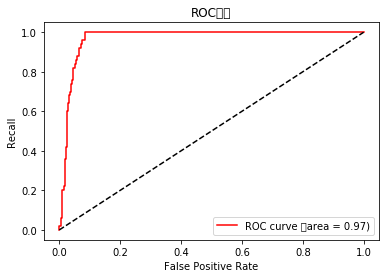

In [44]:
# 绘制roc曲线
area = metrics.roc_auc_score(y, clf_proba.decision_function(X))

plt.figure()
plt.plot(FPR, recall, c='r', label='ROC curve （area = %.2f)' % area)
plt.plot([0, 1], [0, 1], c='k', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')
plt.title('ROC曲线')
plt.legend()
plt.show()